In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import os
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image
mpl.rcParams["text.usetex"] = False
sns.set_style("whitegrid")
sns.axes_style("whitegrid")
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})


In [2]:
results = pd.read_csv("aggregate/aggregate_results_final_final_final_final.csv", index_col=[0])
print(len(results))

432


In [3]:
onemedia = results.loc[results['media_op']=="0.0"]
threemedia = results.loc[results['media_op']=='0.05;0.5;0.95']

In [4]:
print(len(results))
print(len(onemedia))
print(len(threemedia))

432
216
216


In [5]:
#rifare i plot dal fisso e mettere le label in latex per paper
def heatmapsplot(results, measure, x, y, grouping):

    params = ['p_media', 'gam', 'gam_media', 'eps']
    paramsnames = ['p', '$\gamma$', '$\gamma_{media}$', '$\epsilon$']
    parmapping = dict(zip(params, paramsnames))

    sns.set_style("whitegrid")
    # sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
    sns.set(font_scale=0.4)

    # mpl.rcParams["text.usetex"] = True
    # plt.rc('font',weight='bold',**{'family':'serif', 'size':6, 'serif':['Computer Modern Roman']})
    with sns.axes_style("whitegrid"):

        fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(6, 3.6), dpi=600)
        fmt = ".2f"
        if measure=='avg_niter':
            annot=False
        else:
            annot=True
        i = 0
        j = 0
        for val in results[grouping].unique():
            data = results[results[grouping] == val]
            df = data.pivot(x, y, measure)
            a=sns.heatmap(df, vmin=min(results[measure]), vmax=max(results[measure]), cmap='RdBu_r', cbar=False, fmt=fmt, annot=annot, ax= axes[j, i])
            a.set_yticklabels(a.get_yticklabels(), rotation = 0)
            a.set_xticklabels(a.get_xticklabels(), rotation = 0)
            axes[j, i].set_title('{}={}'.format(parmapping[grouping], val), fontsize=5)

            i+=1
            if i % 3 == 0:
                j += 1
                i=0

        for ax in axes.flat:
            ax.set_ylabel('')
            ax.set_xlabel('')
            # ax.set_xlabel(r'{}'.format(parmapping[y]), fontsize=10, labelpad=1)
            ax.tick_params(axis='x', which='major', pad=-2)
            ax.tick_params(axis='y', which='major', pad=-2)

        fig.text(0.00, 0.5, r'{}'.format(parmapping[x]), va='center', rotation='vertical', fontsize=8)
        fig.text(0.5, 0.0, r'{}'.format(parmapping[y]), va='center', rotation='horizontal', fontsize=8)

        # fig.text(0.18, -0.03, r"(a) $p=0.1$", ha='center', fontsize=10)
        # fig.text(0.51, -0.03, r"(b) $p=0.3$", ha='center', fontsize=10)
        # fig.text(0.83, -0.03, r"(c) $p=0.5$", ha='center', fontsize=10)

        cax = fig.add_axes([1.0, 0.3, 0.01, 0.6])
        cbar = fig.colorbar(a.get_children()[0], cax=cax, orientation="vertical")
        cbar.outline.set_visible(False)

        for t in cbar.ax.get_yticklabels():
            t.set_fontsize(10)
        plt.tight_layout()    
        plt.savefig("plots/aggregate/hm media mo{} {} groupedby_{}.png".format(list(results.media_op.unique())[0], measure, grouping))

In [6]:
results.columns

Index(['n', 'density', 'eps', 'gam', 'gam_media', 'p_media', 'max_it',
       'media_op', 'avg_ncluster', 'std_ncluster', 'avg_pwdist', 'std_pwdist',
       'avg_niter', 'std_niter', 'new_avg_ncluster', 'new_std_ncluster',
       '0.01MS_avg_ncluster', '0.01MS_std_ncluster', '0.0001MS_avg_ncluster',
       '0.0001MS_std_ncluster', '0.00001MS_avg_ncluster',
       '0.00001MS_std_ncluster', '10B_avg_entr', '10B_std_entr',
       '100B_avg_entr', '100B_std_entr', 'perc_00', 'perc_005', 'perc_05',
       'perc_095', 'avg_opinion', 'median_opinion', '10B_avg_entr_norm',
       '100B_avg_entr_norm'],
      dtype='object')

c:\programdata\anaconda3\lib\site-packages\ipykernel_launcher.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


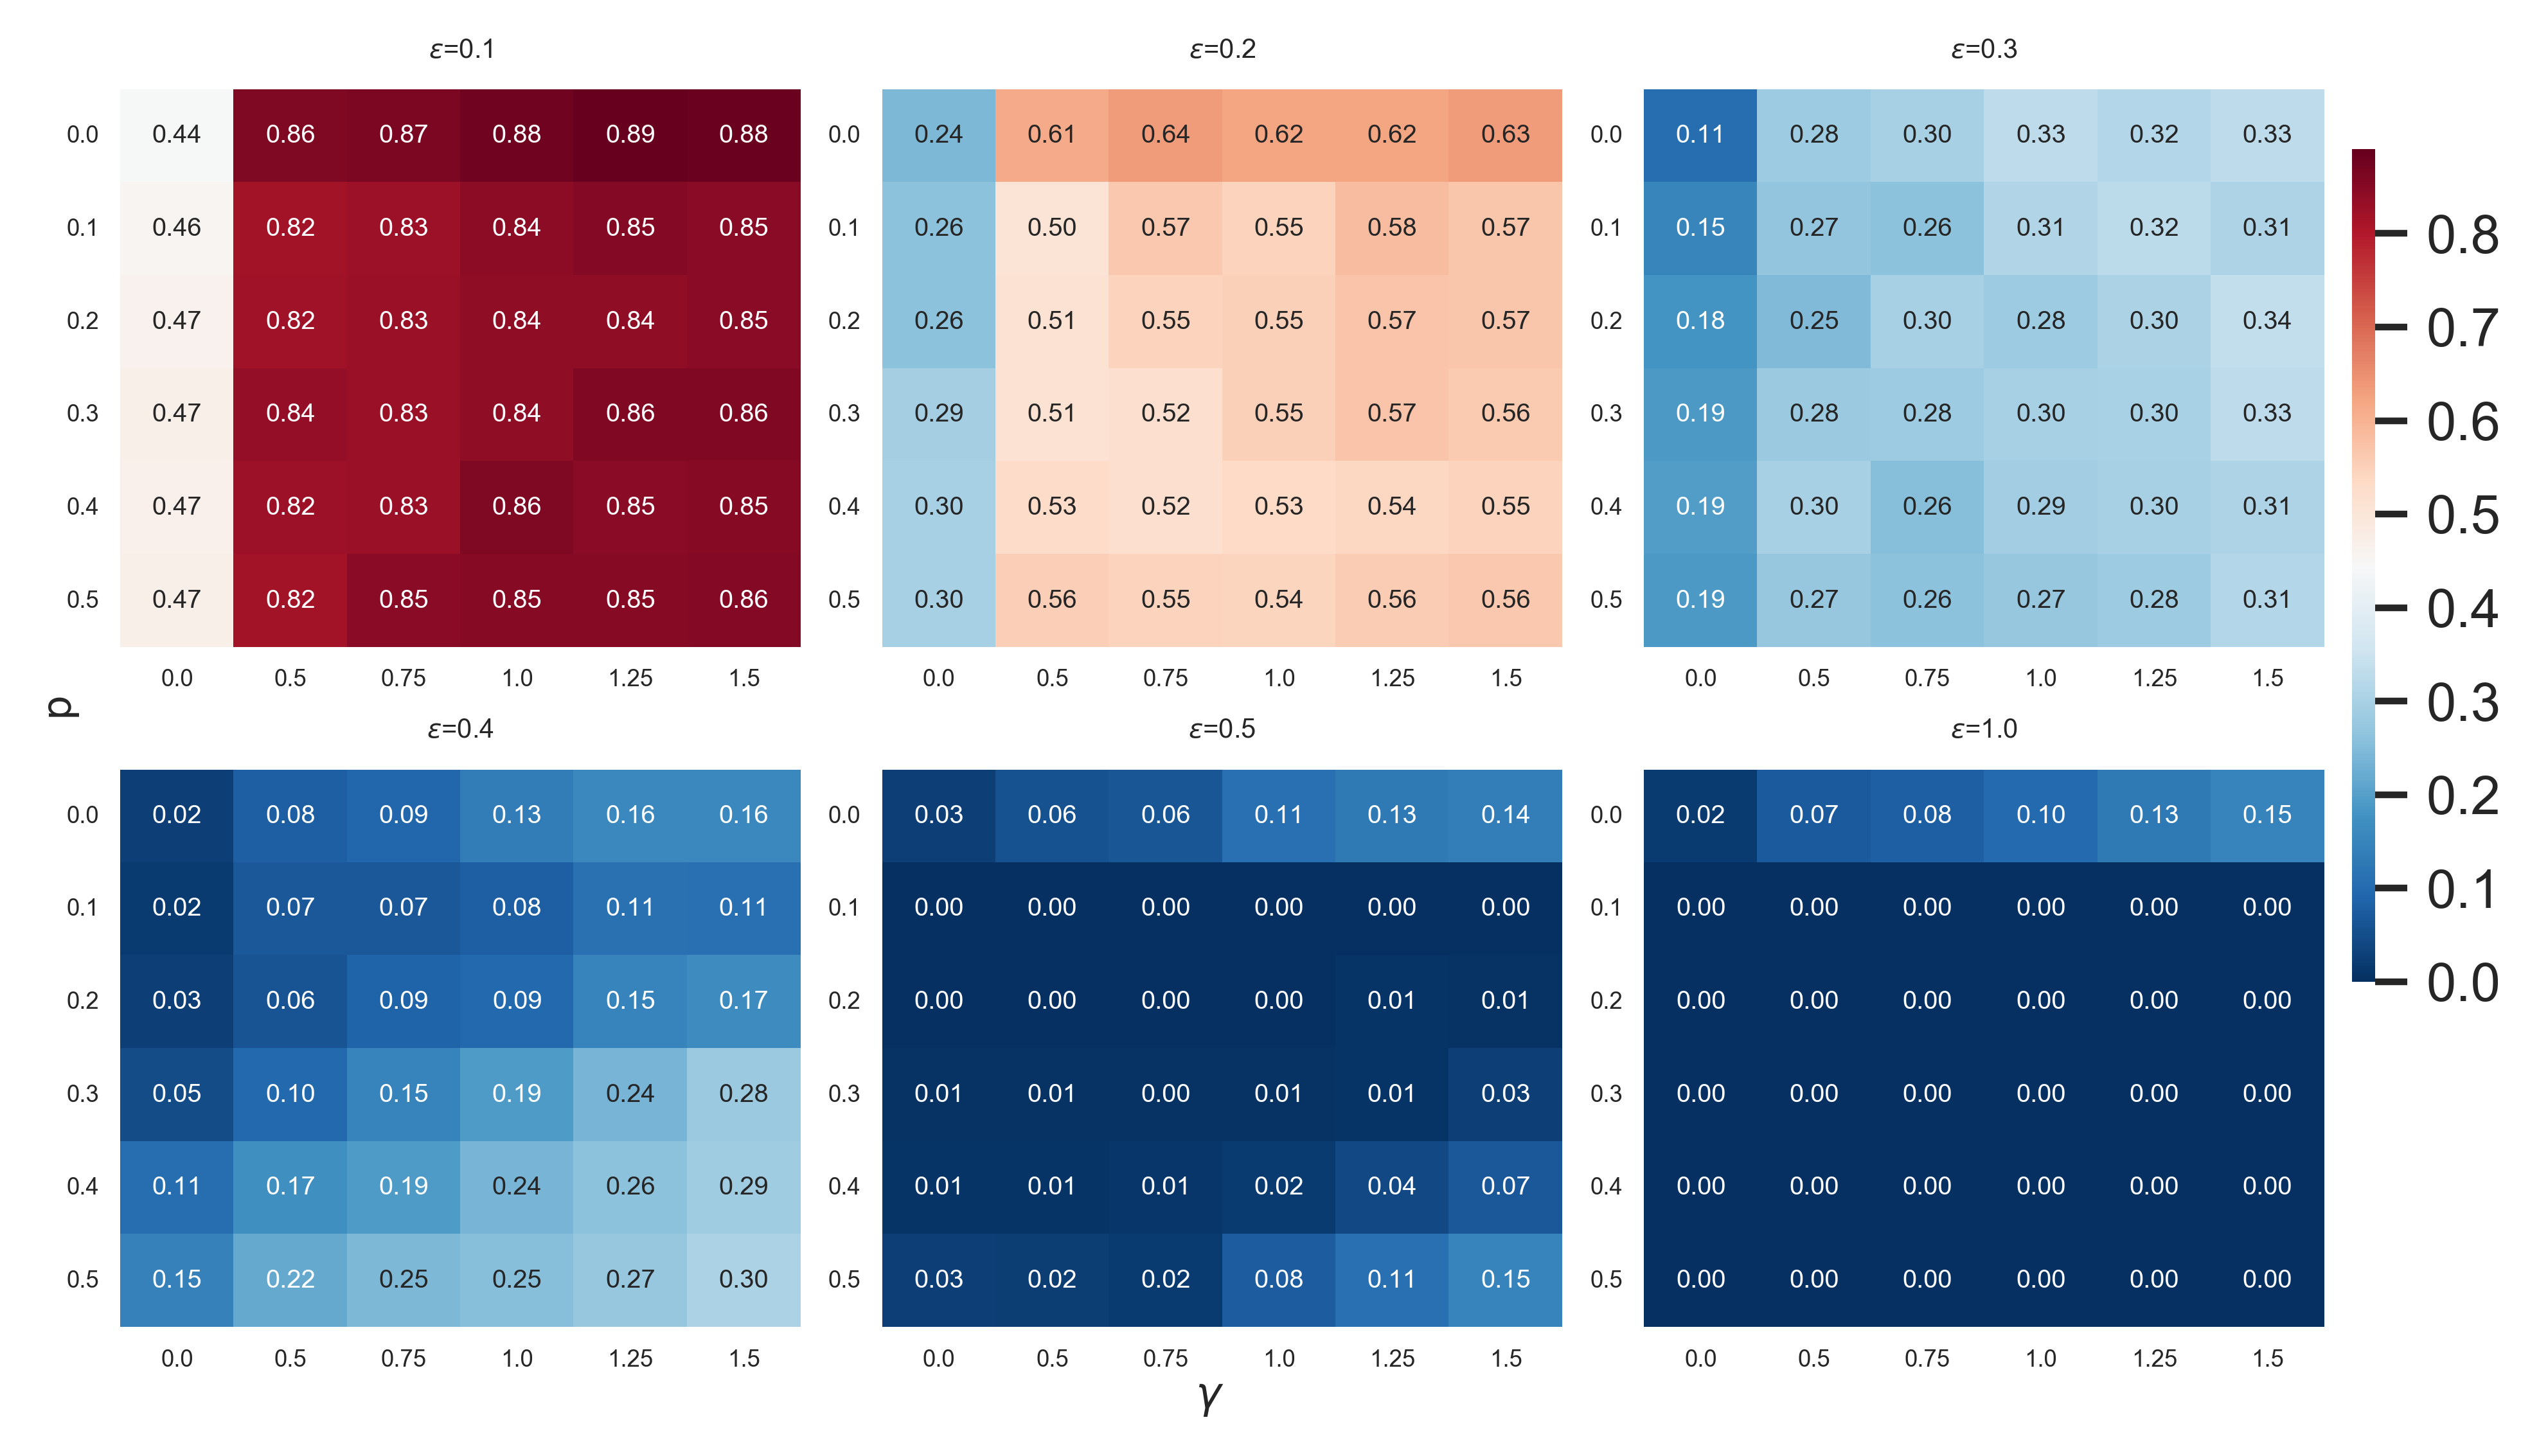

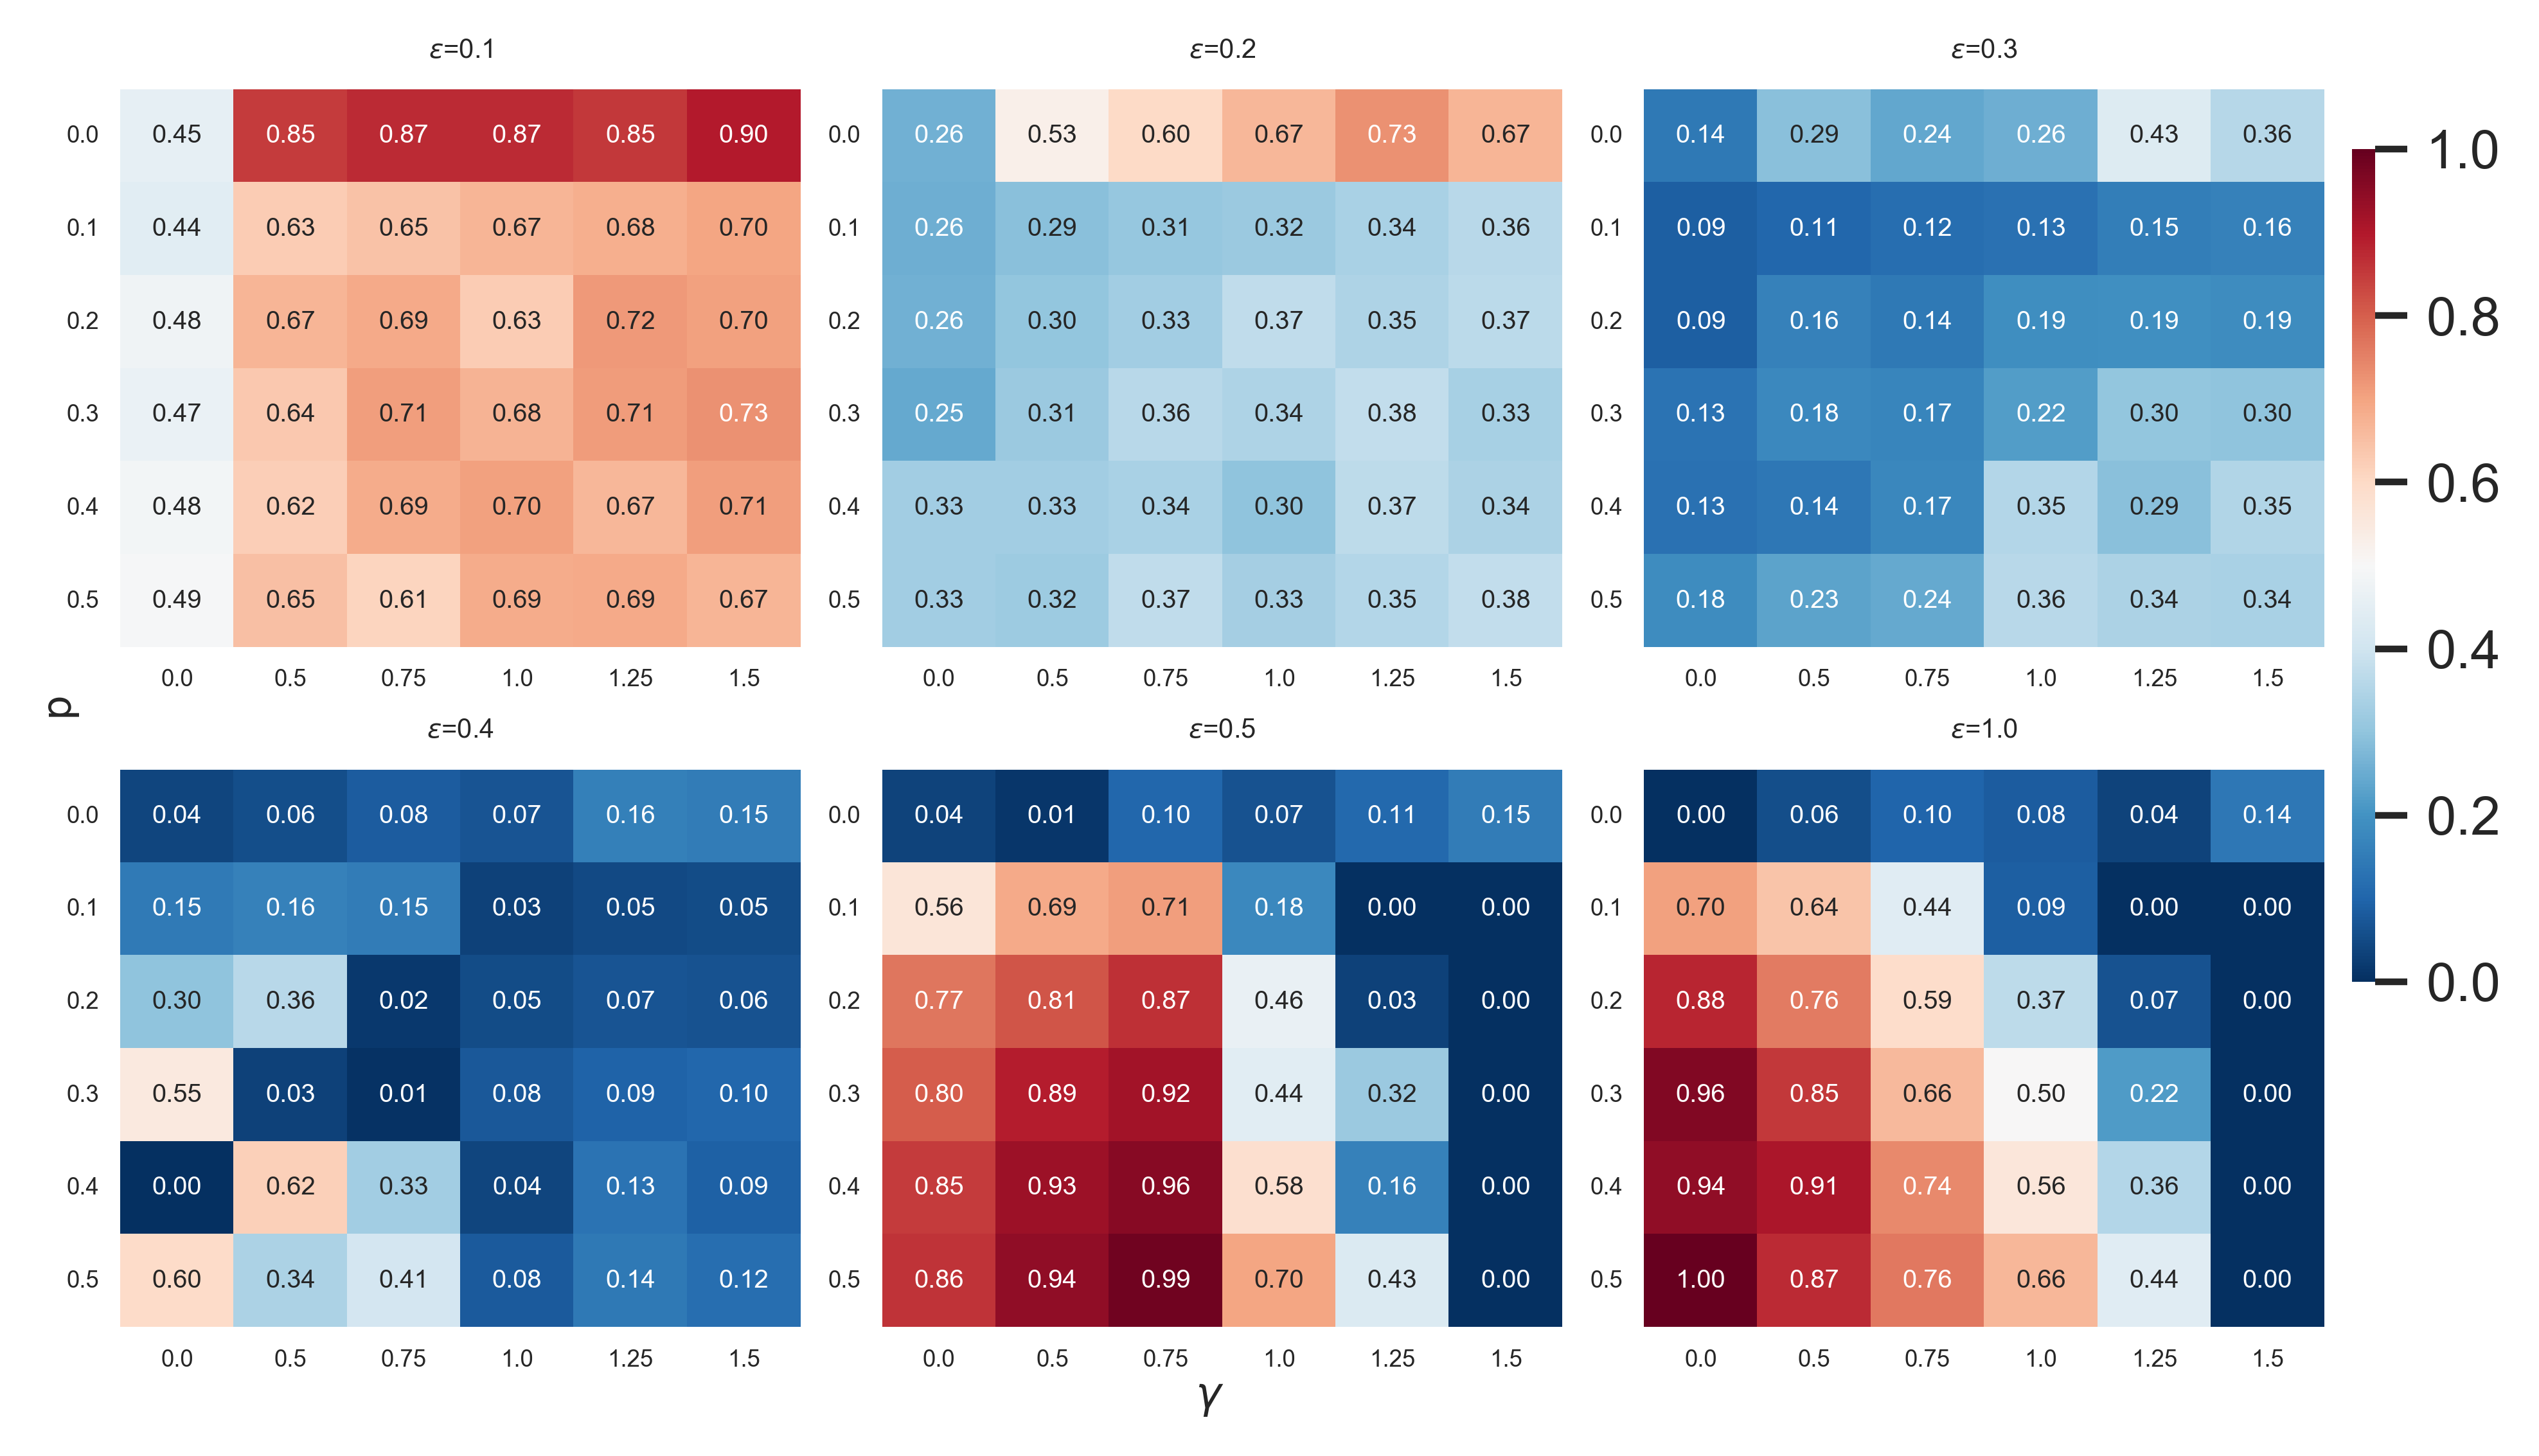

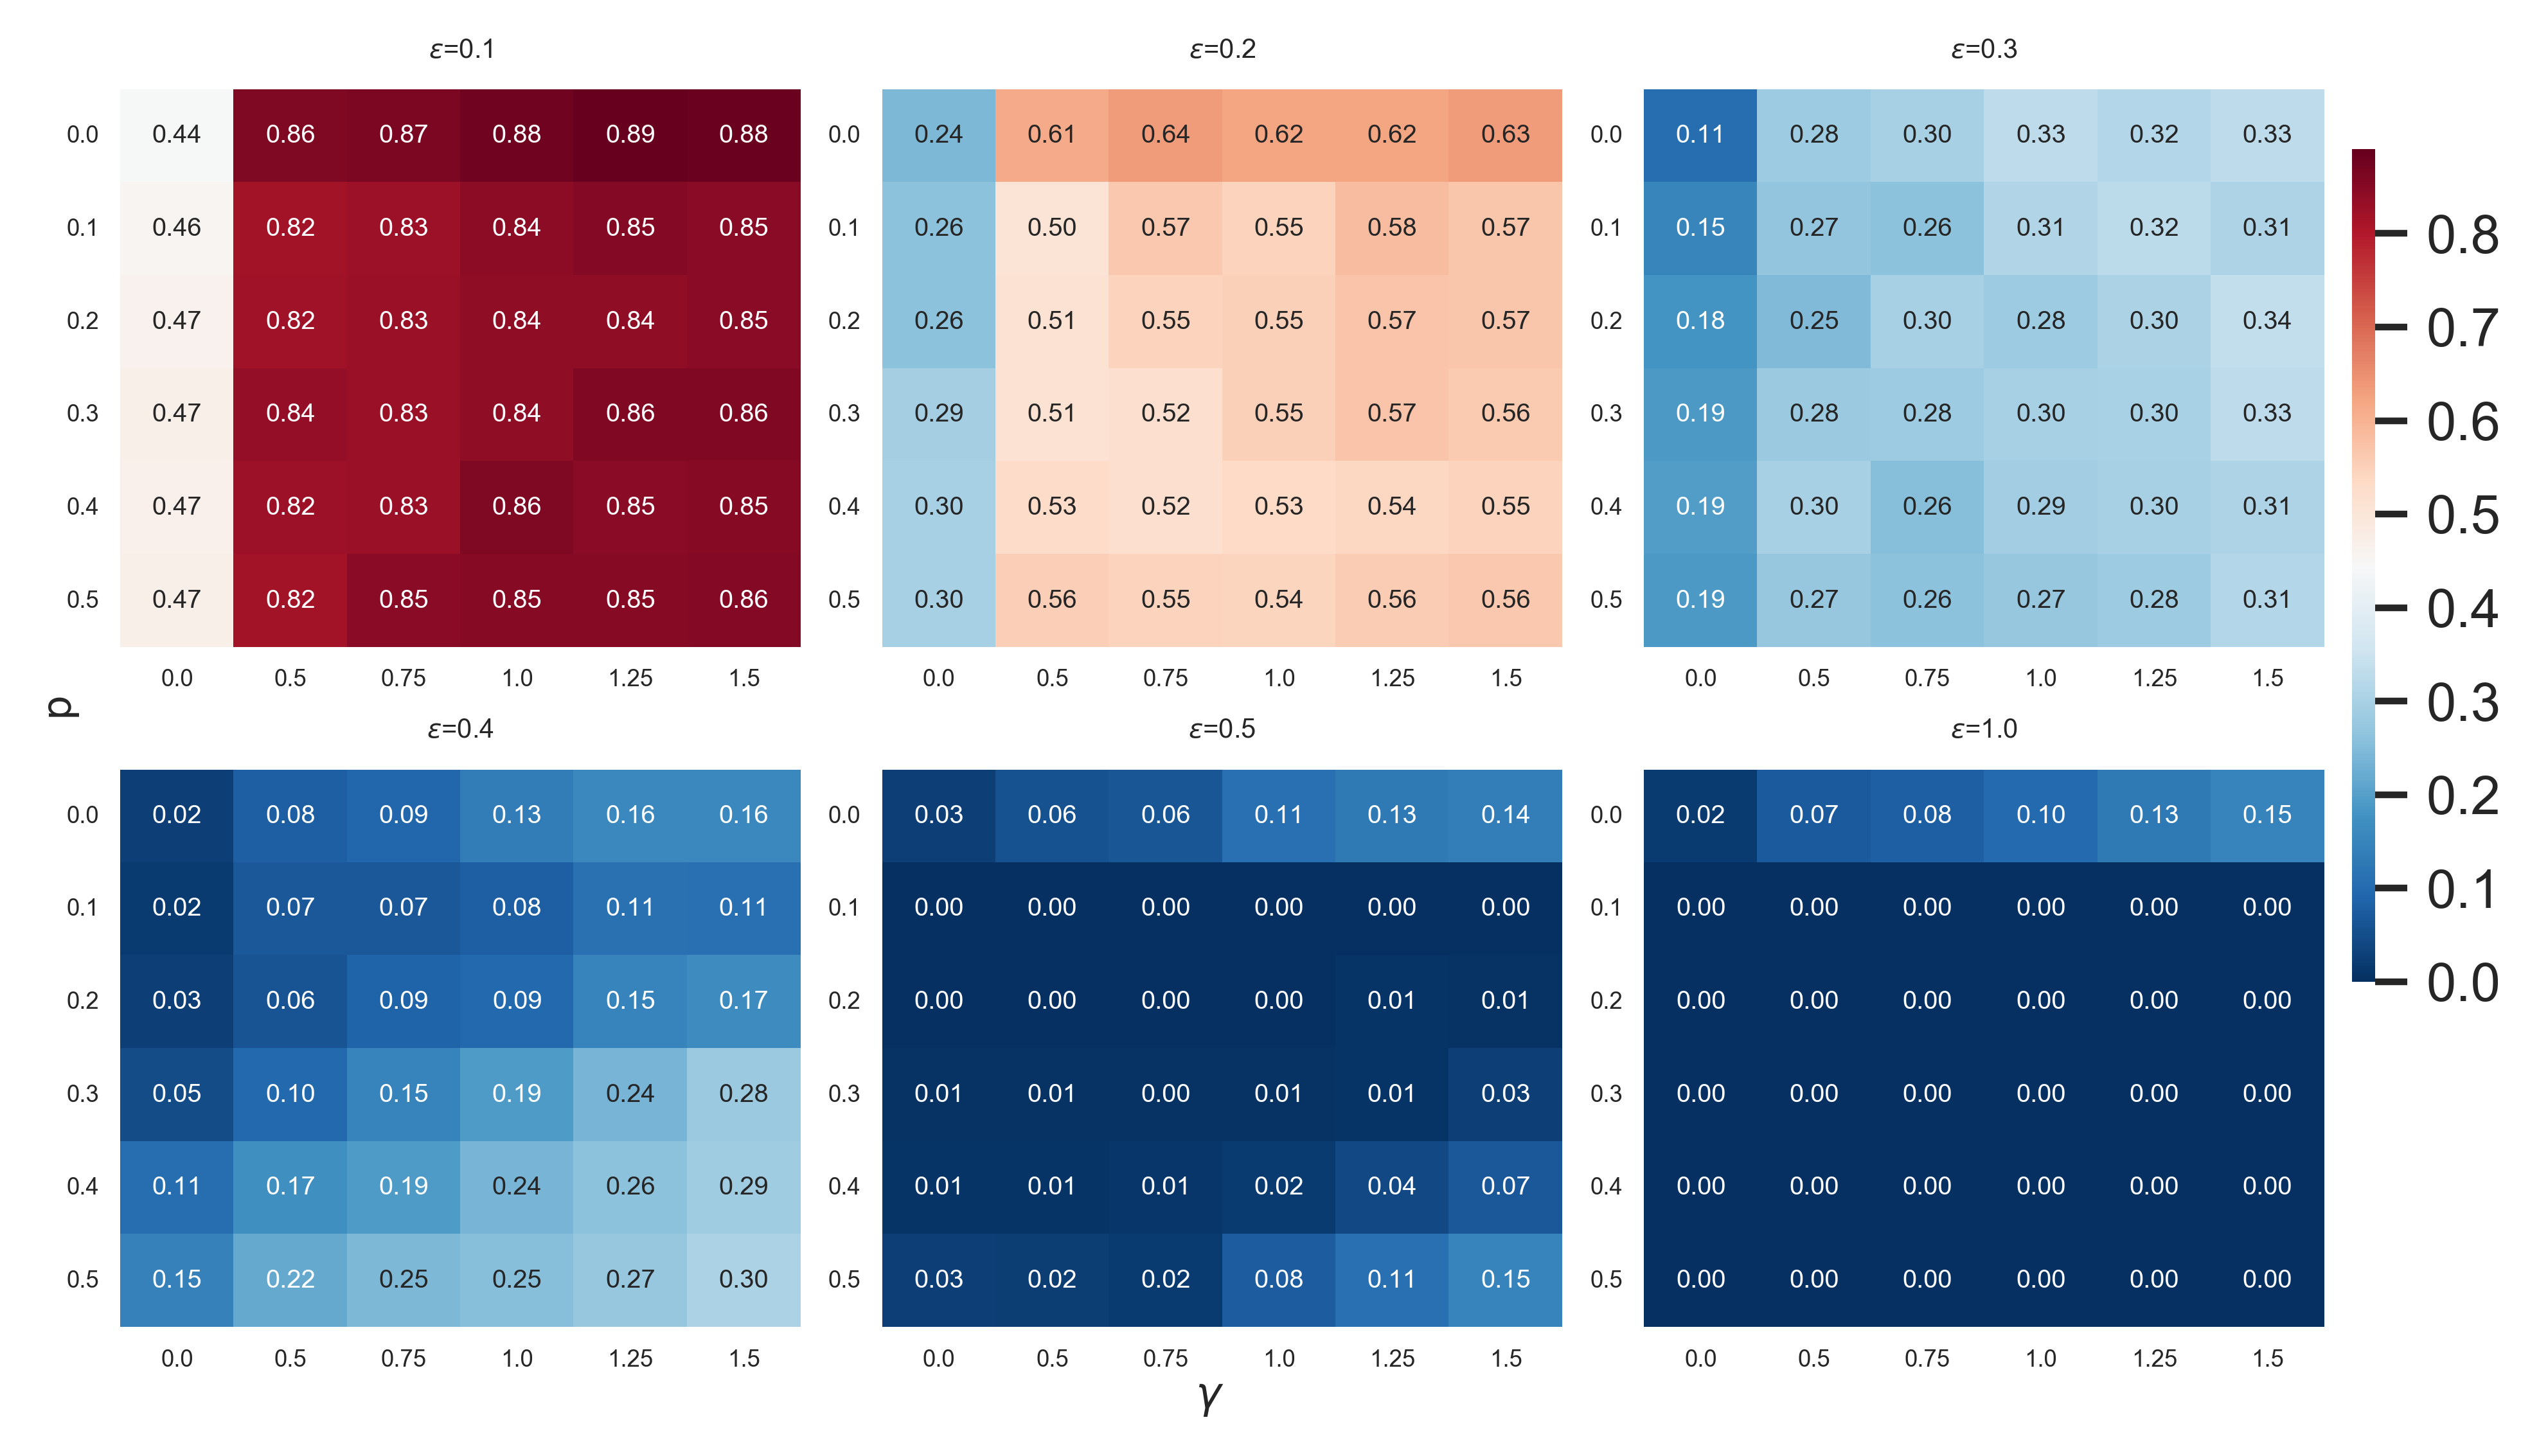

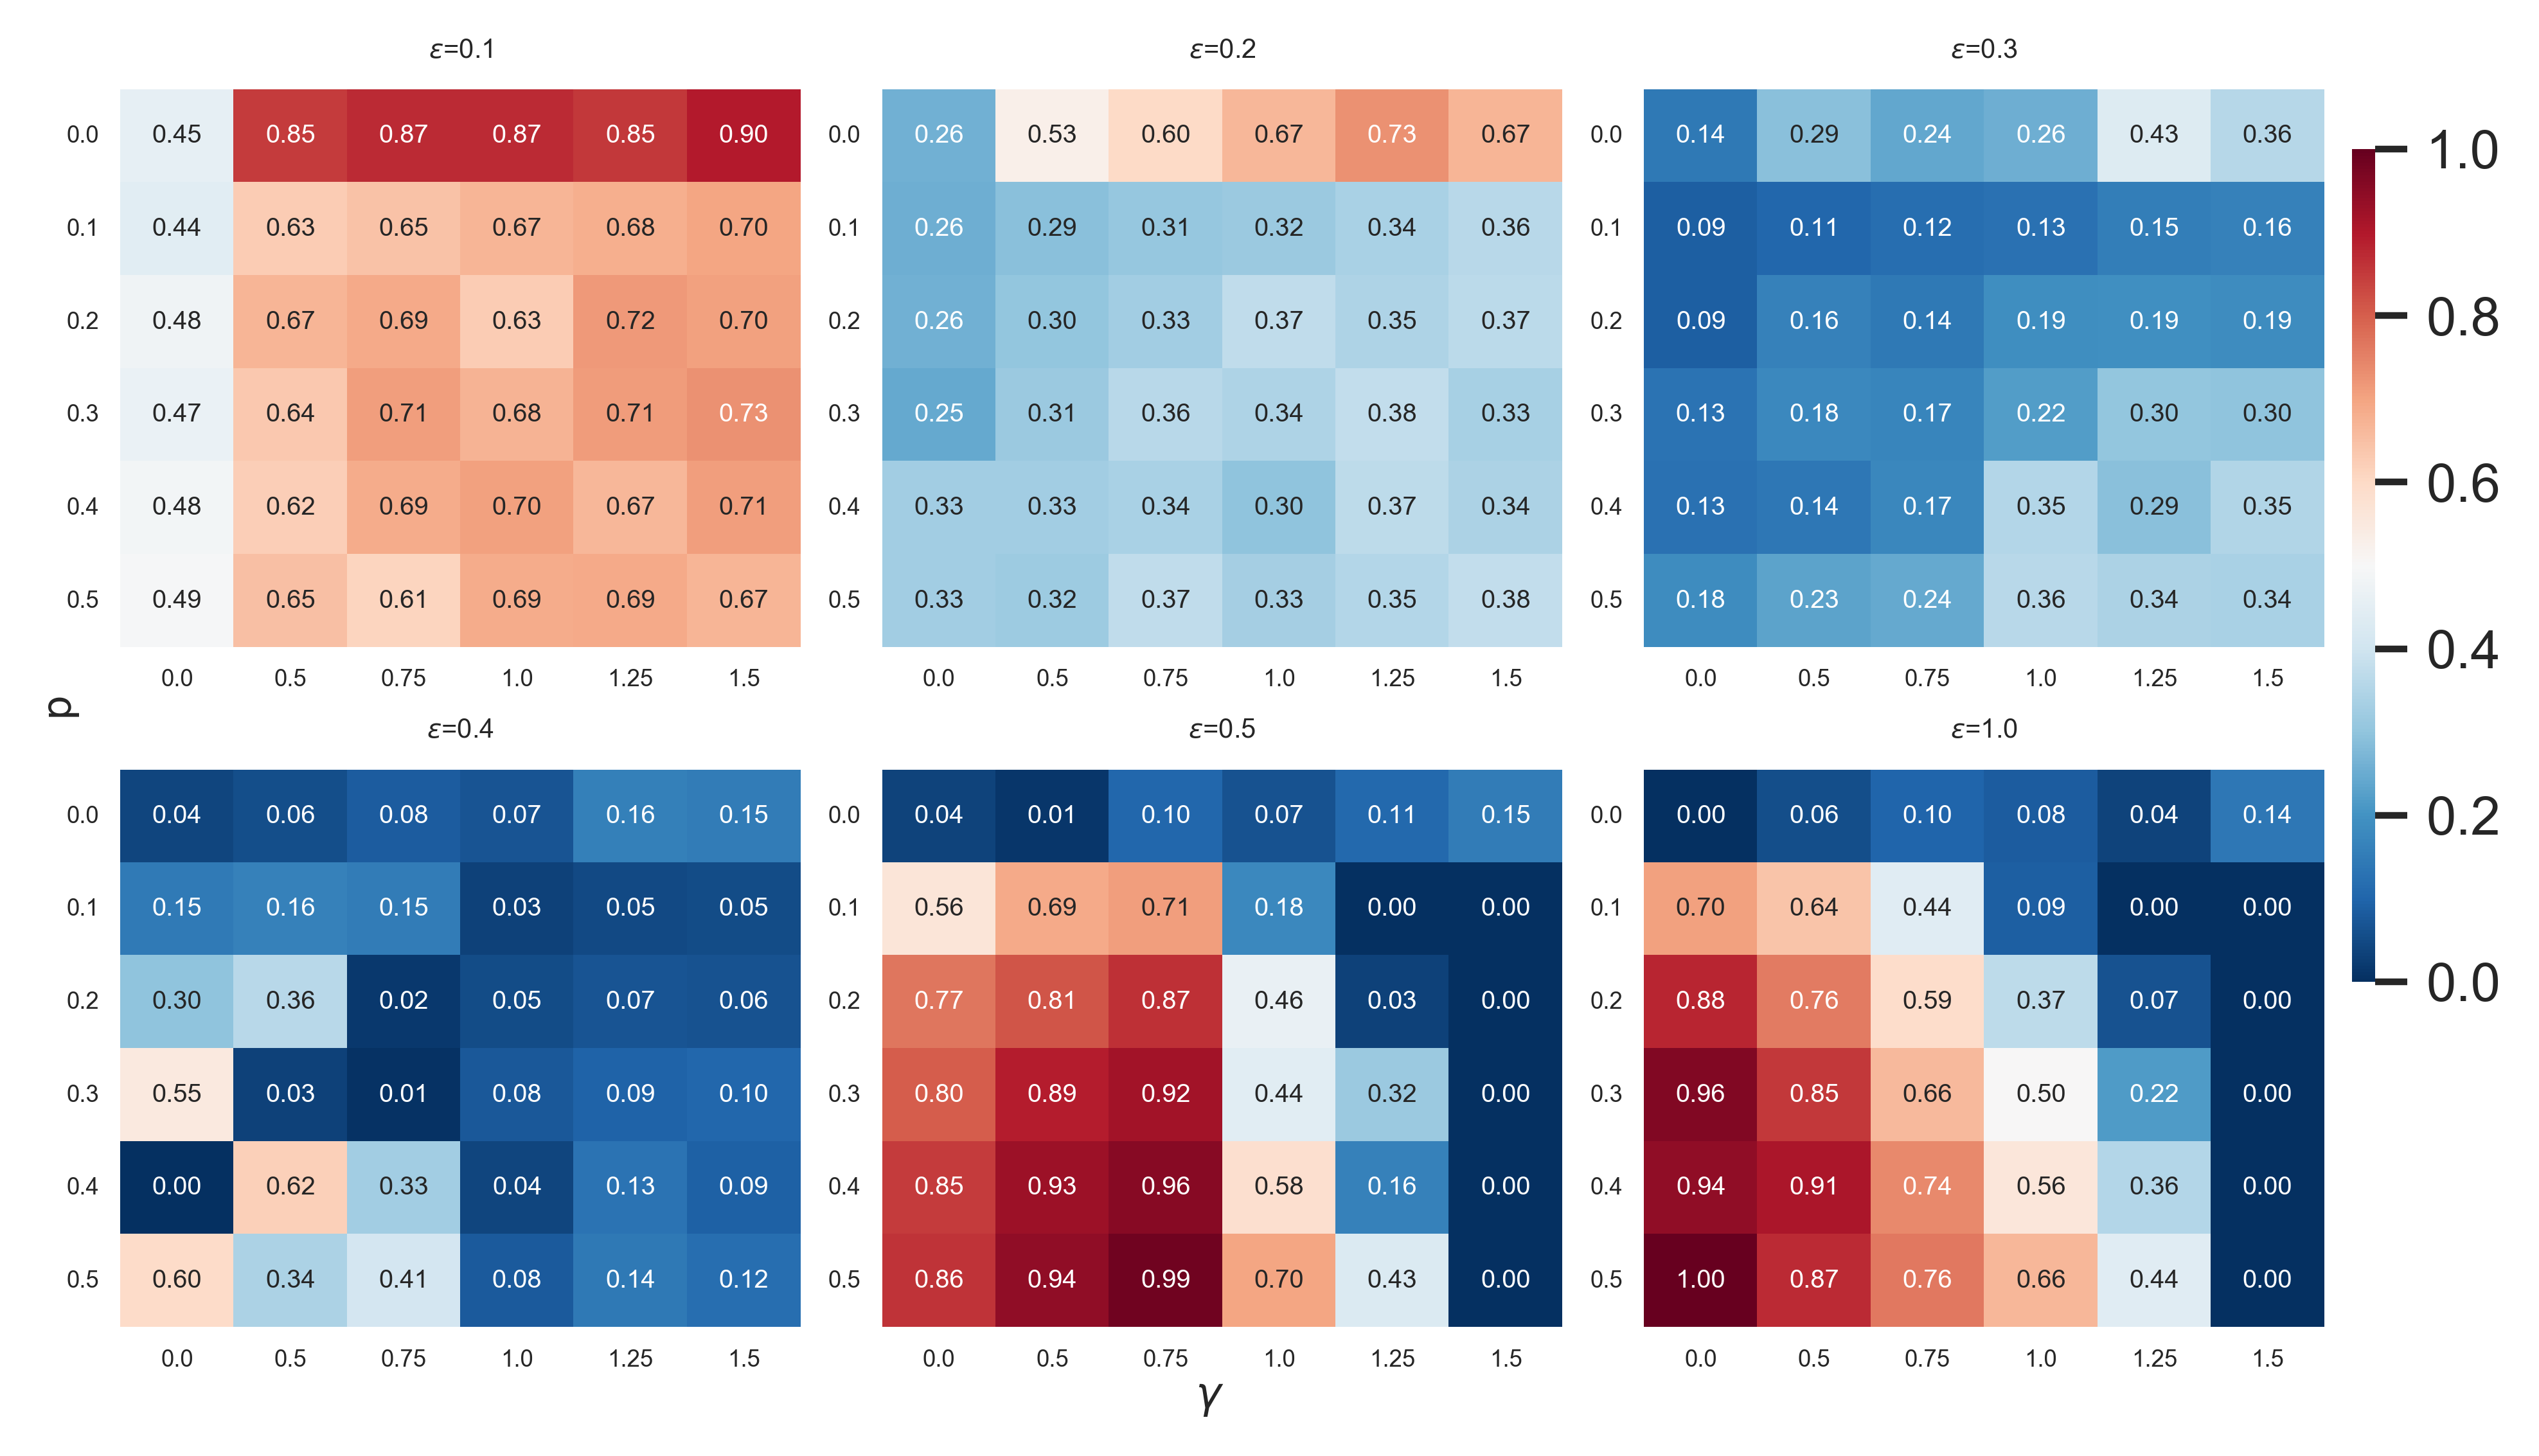

In [16]:
measures = ['10B_avg_entr_norm', '100B_avg_entr_norm']
for measure in measures:
    heatmapsplot(onemedia, measure, x="p_media", y="gam",grouping="eps")
    heatmapsplot(threemedia, measure, x="p_media", y="gam",grouping="eps")

In [8]:
results.head()

n  density  eps   gam  gam_media  p_media   max_it       media_op  \
0  100      1.0  0.1  0.00       0.00      0.1  1000000  0.05;0.5;0.95   
1  100      1.0  0.1  0.50       0.50      0.1  1000000  0.05;0.5;0.95   
2  100      1.0  0.1  0.75       0.75      0.1  1000000  0.05;0.5;0.95   
3  100      1.0  0.1  1.00       1.00      0.1  1000000  0.05;0.5;0.95   
4  100      1.0  0.1  1.25       1.25      0.1  1000000  0.05;0.5;0.95   

   avg_ncluster  std_ncluster  ...  100B_avg_entr  100B_std_entr  perc_00  \
0      4.335848      0.550327  ...       1.525552       0.118379      NaN   
1      5.111224      0.609606  ...       2.153097       0.235560      NaN   
2      5.284581      0.596961  ...       2.220887       0.230256      NaN   
3      5.532513      0.601132  ...       2.306110       0.214404      NaN   
4      5.636583      0.718927  ...       2.346602       0.217108      NaN   

   perc_005  perc_05  perc_095  avg_opinion  median_opinion  \
0    0.0816   0.1278    0.0885     0.500391        0.512610   
1    0.1355   0.1919    0.1251     0.501082        0.498484   
2    0.1366   0.1948    0.1386     0.499976        0.511280   
3    0.1240   0.1829    0.1372     0.497835        0.496840   
4    0.1233   0.1638    0.1281     0.502963        0.502041   

   10B_avg_entr_norm  100B_avg_entr_norm  
0           0.444352            0.444352  
1           0.627139            0.627139  
2           0.646884            0.646884  
3           0.671708            0.671708  
4           0.683502            0.683502  

[5 rows x 34 columns]

In [9]:
results.columns

Index(['n', 'density', 'eps', 'gam', 'gam_media', 'p_media', 'max_it',
       'media_op', 'avg_ncluster', 'std_ncluster', 'avg_pwdist', 'std_pwdist',
       'avg_niter', 'std_niter', 'new_avg_ncluster', 'new_std_ncluster',
       '0.01MS_avg_ncluster', '0.01MS_std_ncluster', '0.0001MS_avg_ncluster',
       '0.0001MS_std_ncluster', '0.00001MS_avg_ncluster',
       '0.00001MS_std_ncluster', '10B_avg_entr', '10B_std_entr',
       '100B_avg_entr', '100B_std_entr', 'perc_00', 'perc_005', 'perc_05',
       'perc_095', 'avg_opinion', 'median_opinion', '10B_avg_entr_norm',
       '100B_avg_entr_norm'],
      dtype='object')

In [10]:
results['10B_avg_entr_norm'].corr(results["new_avg_ncluster"])

0.8979393585230343

In [17]:
from scipy import stats
import numpy as np

def nclusters(data, threshold):
    data = [float(el) for el in data]
    data = sorted(data)
    start = data[0]
    max_val = start + threshold
    c = (start, max_val)
    cluster = dict()
    for i in data:
        if i <= max_val:
            if c in cluster.keys():
                cluster[c] += 1
            else:
                cluster[c] = 1
        else:
            max_val = i + threshold
            c = (i, max_val)
            cluster[c] = 1
    #ora ho il dizionario con i cluster di una run
    C_num = len(data)**2
    C_den = 0
    for k in cluster.keys():
        C_den += cluster[k]*cluster[k]
    C = C_num / C_den
    return C

def entropy(opinions, n, nbins):
    bincounts, bin_edges = np.histogram(opinions, bins = np.linspace(0, 1, nbins))
    probabilities = bincounts/n
    entr = stats.entropy(probabilities)
    return entr

In [18]:
def from_res_to_iterations(name, nr):
    iterations = []
    res = open(f"res/{name} nr{nr}.csv", "r")
    i = 0
    for line in res.readlines():
        d = dict()
        d['iteration'] = i
        d['status'] = {}
        j = 0
        for el in line.split(','):
            d['status'][j] = float(el)
            j+=1
        i += 1
        iterations.append(d)
    return iterations

name = "media mo[0.05, 0.5, 0.95] p0.1 e0.4 g1.25 gm1.25 mi1000000"
its = from_res_to_iterations(name, 1)

In [24]:
import future.utils
import json
def evolution(iterations, nc, entr, fig, ax):

    """
    Generates the plot

    :param filename: Output filename
    :param percentile: The percentile for the trend variance area
    """

    nodes2opinions = {}
    node2col = {}

    last_it = iterations[-1]['iteration'] + 1
    last_seen = {}

    for it in iterations:
        sts = it['status']
        its = it['iteration']
        for n, v in sts.items():
            if n in nodes2opinions:
                last_id = last_seen[n]
                last_value = nodes2opinions[n][last_id]

                for i in range(last_id, its):
                    nodes2opinions[n][i] = last_value

                nodes2opinions[n][its] = v
                last_seen[n] = its
            else:
                nodes2opinions[n] = [0]*last_it
                nodes2opinions[n][its] = v
                last_seen[n] = 0
                if v < 0.33:
                    node2col[n] = '#3776ab'
                elif 0.33 <= v <= 0.66:
                    node2col[n] = '#FFA500'
                else:
                    node2col[n] = '#FF0000'

    mx = 0
    for k, l in future.utils.iteritems(nodes2opinions):
        if mx < last_seen[k]:
            mx = last_seen[k]
        x = list(range(0, last_seen[k]))
        y = l[0:last_seen[k]]
        ax.plot(x, y, lw=1, alpha=0.5, color=node2col[k])
    
    
    ax.set_ylim(-0.1, 1.1)
    ax.tick_params(axis='both', which='major', labelsize=4, pad=0)                
    ax.set_title('nc={}\nentr={}'.format(nc, entr))
    # plt.grid(axis = 'both', which='both')
    plt.tight_layout()
    


def finaldistribution(name, nr, ax):
    jsonfile = open(f'aggregate/final_opinions {name}.json')
    data = json.load(jsonfile)
    finalops = list(data[str(nr)])
    nc = nclusters(finalops, 0.01)
    entr = entropy(finalops, 100, 10)
    x = [i for i in range(100)]
    y = sorted(finalops)    
    node2col = {}
    for node in x:
        if y[node] < 0.33:
            node2col[node] = '#3776ab'
        elif 0.33 <= y[node] <= 0.66:
            node2col[node] = '#FFA500'
        else:
            node2col[node] = '#FF0000'
    for node in x:
        ax.scatter(x[node], y[node], s = 0.1, c = node2col[node])
    ax.set_ylim(-0.1, 1.1)
    ax.set_title('nc={}\nentr={}'.format(nc, entr))
    ax.tick_params(axis='both', which='major', labelsize=3, pad=2)                
    plt.grid(axis = 'both', which='both')
    plt.tight_layout()

In [25]:
from tqdm import tqdm
def spaghettigridbyp(mo):
    plist = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
    elist = [0.2, 0.3, 0.4, 0.5, 1.0]
    glist = [0.0, 0.5, 0.75, 1.0, 1.25, 1.5]
    for p in plist:
        with tqdm(total=len(elist)*len(glist)) as pbar:
            fig, axes = plt.subplots(nrows=len(elist), ncols=len(glist), figsize=(len(glist), len(elist)), dpi=600, sharey=True)
            row=0
            for e in elist:
                col=0
                for g in glist: 
                    name = f'media mo{mo} p{p} e{e} g{g} gm{g} mi1000000'
                    nr = 1
                    iterations = from_res_to_iterations(name, nr)
                    finalops = [el for el in iterations[-1]['status'].values()]
                    nc = nclusters(finalops, 0.01)
                    entr = entropy(finalops, 100, 10)
                    evolution(iterations, nc, entr, fig=fig, ax=axes[row,col])
                    axes[row,col].set_xlabel(r"$\gamma$ = {}".format(g))
                    axes[row,col].set_ylabel(r"$\epsilon$ = {}".format(e))
                    axes[row,col].set_title("p={}".format(p))
                    col+=1
                    pbar.update(1)
                row+=1
            name = f'media mo{mo} p{p}'
            plt.savefig(f"plots/aggregate/evolutiongrid {name}.png")
            plt.close()

def spaghettigridbye(mo):
    plist = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
    elist = [0.2, 0.3, 0.4, 0.5, 1.0]
    glist = [0.0, 0.5, 0.75, 1.0, 1.25, 1.5]
    for e in elist:
        with tqdm(total=len(plist)*len(glist)) as pbar:
            fig, axes = plt.subplots(nrows=len(plist), ncols=len(glist), figsize=(len(glist), len(plist)), dpi=600, sharey=True)
            row=0
            for p in plist:
                col=0
                for g in glist: 
                    name = f'media mo{mo} p{p} e{e} g{g} gm{g} mi1000000'
                    nr = 1
                    iterations = from_res_to_iterations(name, nr)
                    iterations = from_res_to_iterations(name, nr)
                    finalops = [el for el in iterations[-1]['status'].values()]
                    nc = nclusters(finalops, 0.01)
                    entr = entropy(finalops, 100, 10)
                    evolution(iterations, nc, entr, fig=fig, ax=axes[row,col])
                    col+=1
                    pbar.update(1)
                row+=1
            name = f'media mo{mo} e{e}'
            plt.savefig(f"plots/aggregate/evolutiongrid {name}.png")
            plt.close()

In [26]:
def finaldistributiongridbye(mo):
    plist = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
    elist = [0.2, 0.3, 0.4, 0.5, 1.0]
    glist = [0.0, 0.5, 0.75, 1.0, 1.25, 1.5]
    for e in elist:
        with tqdm(total=len(plist)*len(glist)) as pbar:
            fig, axes = plt.subplots(nrows=len(plist), ncols=len(glist), figsize=(len(glist), len(plist)), dpi=600, sharey=True)
            row=0
            for p in plist:
                col=0
                for g in glist: 
                    name = f'media mo{mo} p{p} e{e} g{g} gm{g} mi1000000'
                    finaldistribution(name, 1, axes[row, col])
                    col+=1
                    pbar.update(1)
                row+=1
            name = f'media mo{mo} e{e}'
            plt.savefig(f"plots/aggregate/distributiongrid {name}.png")
            plt.close()

def finaldistributiongridbyp(mo):
    plist = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
    elist = [0.2, 0.3, 0.4, 0.5, 1.0]
    glist = [0.0, 0.5, 0.75, 1.0, 1.25, 1.5]
    for p in plist:
        with tqdm(total=len(elist)*len(glist)) as pbar:
            fig, axes = plt.subplots(nrows=len(elist), ncols=len(glist), figsize=(len(glist), len(elist)), dpi=600, sharey=True)
            row=0
            for e in elist:
                col=0
                for g in glist: 
                    name = f'media mo{mo} p{p} e{e} g{g} gm{g} mi1000000'
                    finaldistribution(name, 1, axes[row, col])
                    col+=1
                    pbar.update(1)
                row+=1
            name = f'media mo{mo} p{p}'
            plt.savefig(f"plots/aggregate/distributiongrid {name}.png")
            plt.close()

 50%|█████     | 18/36 [00:28<00:28,  1.58s/it]


FileNotFoundError: [Errno 2] No such file or directory: 'res/media mo[0.0] p0.3 e0.2 g0.0 gm0.0 mi1000000 nr1.csv'

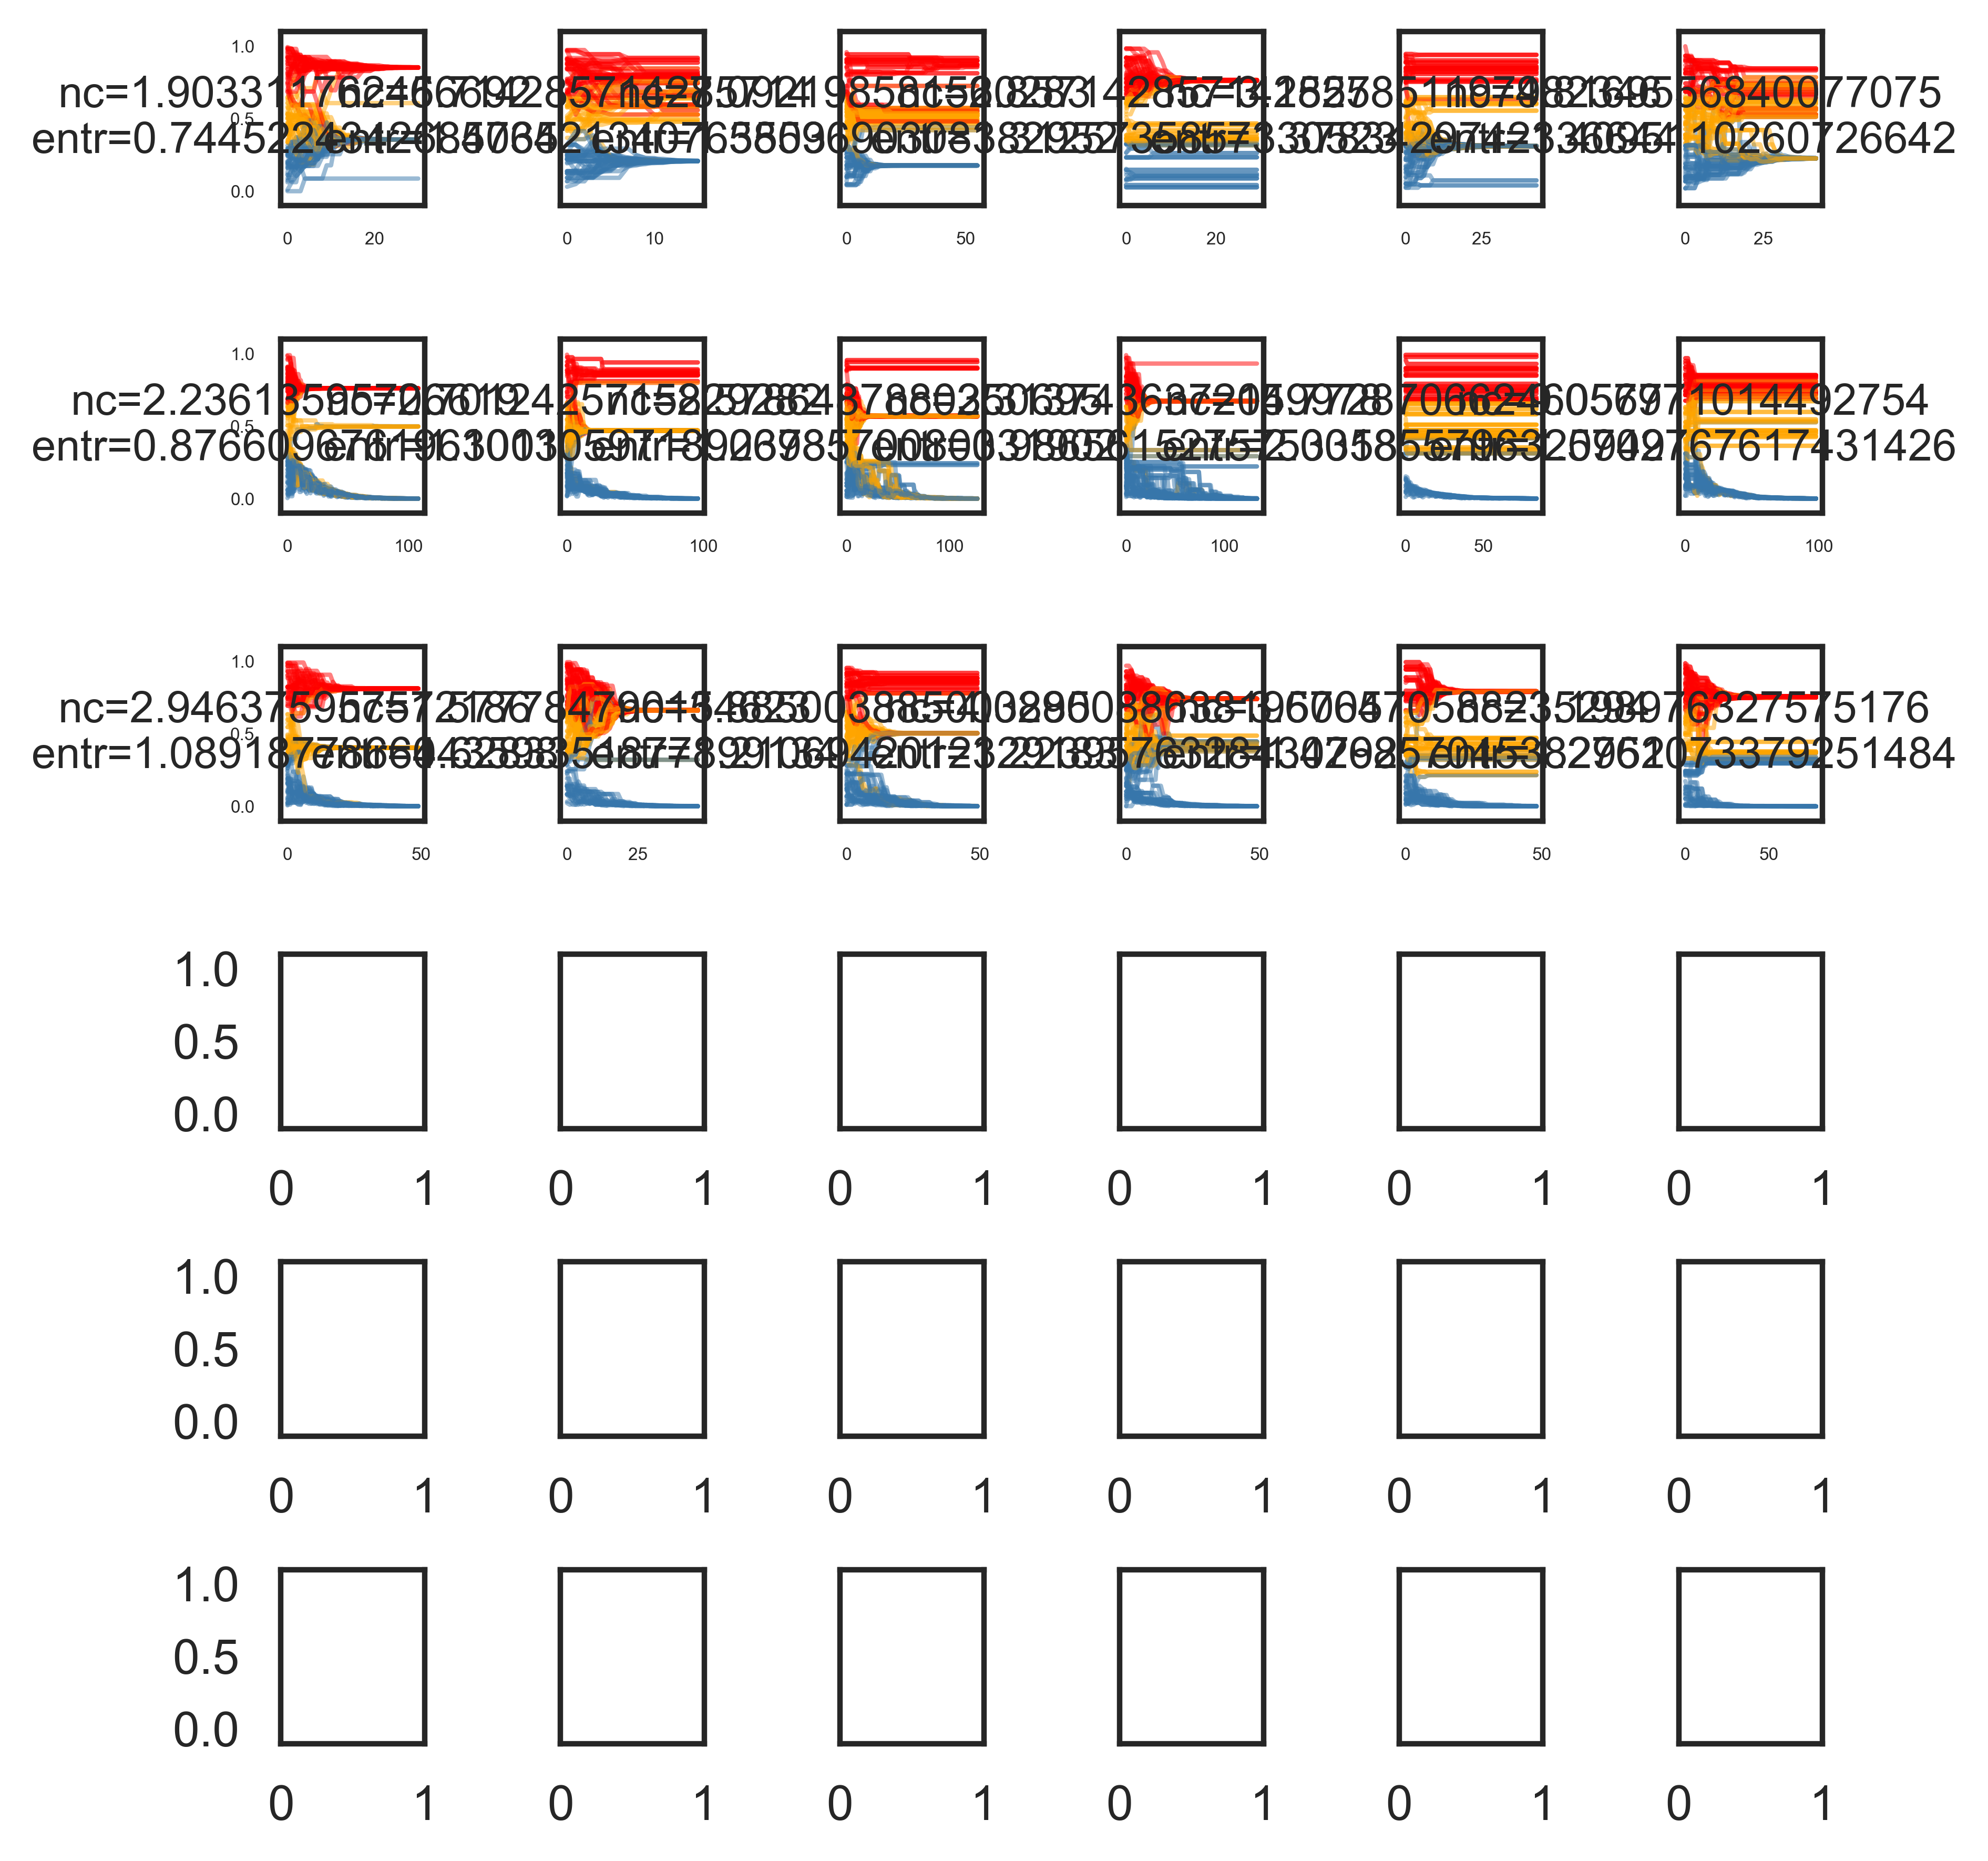

In [27]:
spaghettigridbye('[0.0]')